In [1]:
import pandas as pd
import numpy as np
import os

#os.chdir("/Users/Jaebin/Documents/Stevens Fall 2019/Applied Analytics/") #set general working directory

county = pd.read_csv("Complete county file.csv") # specific directory for where the dataset is

In [2]:
county.columns

Index(['fipstate', 'fipscty', 'naics', 'empflag', 'emp_nf', 'emp', 'qp1_nf',
       'qp1', 'ap_nf', 'ap', 'est', 'n1_4', 'n5_9', 'n10_19', 'n20_49',
       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1',
       'n1000_2', 'n1000_3', 'n1000_4', 'censtate', 'cencty'],
      dtype='object')

In [3]:
county.shape

(2124893, 26)

In [4]:
county['fipstate'].value_counts().head()

48    145166
13     92273
51     86387
37     79650
39     79107
Name: fipstate, dtype: int64

In [5]:
# randomly sample 20000 samples
county = county.sample(300000).reset_index(drop = True)

In [6]:
county = county[(county.fipstate == 48)]

In [7]:
county.head()

,fipstate,fipscty,naics,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,...,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,censtate,cencty
2,48,403,3211//,B,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,403
3,48,339,236117,NaN,H,250,H,5583,H,25531,...,1,0,0,0,0,0,0,0,74,339
13,48,429,813410,A,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,429
27,48,497,812111,B,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,497
28,48,29,811112,NaN,J,8,J,38,H,185,...,0,0,0,0,0,0,0,0,74,29


In [8]:
# combine small size companies into one category
county["sz_small"] = county["n1_4"] + county["n5_9"] + county["n10_19"] + county["n20_49"] + county["n50_99"]

# combine medium size companies into one category
county["sz_med"] = county["n100_249"] + county["n250_499"] + county["n500_999"]

# combine large size companies into one category
county["sz_lrg"] = county["n1000_1"] + county["n1000_2"] + county["n1000_3"] + county["n1000_4"]

county = county.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf", "censtate", "cencty",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [9]:
county.dtypes

fipstate     int64
fipscty      int64
naics       object
emp          int64
qp1          int64
ap           int64
est          int64
sz_small     int64
sz_med       int64
sz_lrg       int64
dtype: object

# for NACIS, removing "-" and "/" and converting to integers
# takes several minutes, you'll know when it's done from the icon on the window tab

for i in range(0,len(county["naics"])):
    a = str(county["naics"][i])
    if county["naics"][i] == "------":
        county["naics"][i] = 0
    elif "-" in county["naics"][i]:
        county["naics"][i] = int(a.replace("-", ""))        
    elif "/" in county["naics"][i]:
        county["naics"][i] = int(a.replace("/", ""))
    else:
        county["naics"][i] = int(a)

In [10]:
county.naics=county.naics.replace('-','',regex=True)
county.naics=county.naics.replace('/','',regex=True)

In [11]:
county.head()

,fipstate,fipscty,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
2,48,403,3211,0,0,0,2,2,0,0
3,48,339,236117,250,5583,25531,34,33,1,0
13,48,429,813410,0,0,0,1,1,0,0
27,48,497,812111,0,0,0,2,2,0,0
28,48,29,811112,8,38,185,4,4,0,0


In [12]:
county = county.add_prefix('COUNTY_')


In [13]:
county.head()

,COUNTY_fipstate,COUNTY_fipscty,COUNTY_naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg
2,48,403,3211,0,0,0,2,2,0,0
3,48,339,236117,250,5583,25531,34,33,1,0
13,48,429,813410,0,0,0,1,1,0,0
27,48,497,812111,0,0,0,2,2,0,0
28,48,29,811112,8,38,185,4,4,0,0


In [14]:
county.columns = ['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp',
       'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small',
       'COUNTY_sz_med', 'COUNTY_sz_lrg']

## Your tasks

1. change the dataset your respective dataset
2. identify the columns and make sure the names are the same
3. if you have columns that aren't in the County data, use your judgement to drop or include it
4. go over the project proposal and understand exactly what we're trying to do
5. feel free to ask questions if you have. But if it's coding related, please try it on your own first
   and ask me or Sandeep if you really can't figure it out.

In [15]:
US_file = pd.read_csv('complete US file.csv',header=0, encoding='UTF-8')
US_file = US_file.drop(['uscode',  'empflag', 'emp_nf', 'qp1_nf',
       'ap_nf', 'f1_4', 'e1_4nf', 'e1_4', 'q1_4nf', 'q1_4',
       'a1_4nf', 'a1_4', 'f5_9', 'e5_9nf', 'e5_9', 'q5_9nf', 'q5_9',
       'a5_9nf', 'a5_9', 'f10_19', 'e10_19nf', 'e10_19', 'q10_19nf',
       'q10_19', 'a10_19nf', 'a10_19', 'f20_49', 'e20_49nf',
       'e20_49', 'q20_49nf', 'q20_49', 'a20_49nf', 'a20_49',
       'f50_99', 'e50_99nf', 'e50_99', 'q50_99nf', 'q50_99', 'a50_99nf',
       'a50_99', 'f100_249', 'e100_249nf', 'e100_249', 'q100_249nf',
       'q100_249', 'a100_249nf', 'a100_249', 'f250_499',
       'e250_499nf', 'e250_499', 'q250_499nf', 'q250_499', 'a250_499nf',
       'a250_499', 'f500_999', 'e500_999nf', 'e500_999',
       'q500_999nf', 'q500_999', 'a500_999nf', 'a500_999', 'f1000',
       'e1000nf', 'e1000', 'q1000nf', 'q1000', 'a1000nf', 'a1000'],axis=1)

In [16]:
# combine small size companies into one category
US_file["sz_small"] = US_file["n1_4"] + US_file["n5_9"] + US_file["n10_19"] + US_file["n20_49"] + US_file["n50_99"]

# combine medium size companies into one category
US_file["sz_med"] = US_file["n100_249"] + US_file["n250_499"] + US_file["n500_999"]

# combine large size companies into one category
US_file["sz_lrg"] = US_file["n1000"] 

US_file = US_file.drop(columns = [
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000" ])

In [17]:
US_file.naics=US_file.naics.replace('-','',regex=True)
US_file.naics=US_file.naics.replace('/','',regex=True)
#US_file.lfo=US_file.lfo.replace('-','',regex=True)

In [18]:
US_file.head()

,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,,-,126752238,1604399617,6435142055,7757807,7568676,181471,7660
1,,C,55545767,888858468,3363492811,2114076,2014258,95948,3870
2,,Z,33631600,313406667,1405230530,3251536,3213293,37534,709
3,,S,4749707,37112956,157784272,899679,895824,3715,140
4,,P,14926406,167485849,682046178,883952,861739,21636,577


In [19]:
US_file = US_file.add_prefix('US_')



In [20]:
US_file.columns

Index(['US_naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [21]:
US_file.columns = ['naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg']

In [22]:
state = pd.read_csv("complete state file.csv") # specific directory for where the dataset is

In [23]:
# combine small size companies into one category
state["sz_small"] = state["n1_4"] + state["n5_9"] + state["n10_19"] + state["n20_49"] + state["n50_99"]

# combine medium size companies into one category
state["sz_med"] = state["n100_249"] + state["n250_499"] + state["n500_999"]

# combine large size companies into one category
state["sz_lrg"] = state["n1000"] 
state = state.drop(columns = ["f500_999","f1_4","e1_4nf","empflag","q1_4nf","a1_4nf","e5_9nf","q5_9nf","a5_9nf","f10_19","e10_19nf","q10_19nf","a10_19nf","f20_49","e20_49nf","q20_49nf","emp_nf", "qp1_nf", "ap_nf", "censtate","f1000",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000","e50_99nf","q50_99nf","a50_99nf","f100_249","e100_249nf","q100_249nf","a100_249nf","e250_499nf","q250_499nf","a250_499nf","e500_999nf","q500_999nf","a500_999nf","e1000nf","q1000nf","a1000nf",
                                    'e1_4', 'q1_4',
                               'a1_4', 'f5_9', 'e5_9', 'q5_9', 'a5_9', 'e10_19', 'q10_19', 'a10_19',
                               'e20_49', 'q20_49', 'a20_49nf', 'a20_49', 'f50_99', 'e50_99', 'q50_99',
                               'a50_99', 'e100_249', 'q100_249', 'a100_249', 'f250_499', 'e250_499',
                               'q250_499', 'a250_499', 'e500_999', 'q500_999', 'a500_999', 'e1000',
                               'q1000', 'a1000', ])

In [24]:
state.head()

,fipstate,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,1,------,-,1673249,16667378,68970623,99584,97088,2404,92
1,1,------,C,766685,8868459,35219759,28682,27284,1349,49
2,1,------,Z,473577,4150278,18378077,37856,37302,541,13
3,1,------,S,67223,490235,2119042,11465,11413,50,2
4,1,------,P,180868,1518668,6433918,11941,11691,243,7


In [25]:
state.naics=state.naics.replace('-','',regex=True)

In [26]:
state.naics=state.naics.replace('/','',regex=True)

In [27]:
state.isnull().sum()

fipstate    0
naics       0
lfo         0
emp         0
qp1         0
ap          0
est         0
sz_small    0
sz_med      0
sz_lrg      0
dtype: int64

In [28]:
state.shape

(448310, 10)

In [29]:
#state['fipstate'].value_counts()


In [30]:
state = state.add_prefix('state_')



In [31]:
state.columns

Index(['state_fipstate', 'state_naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg'],
      dtype='object')

In [32]:
state.columns = ['fipstate', 'naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg']

In [33]:
county.columns

Index(['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp', 'COUNTY_qp1',
       'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med',
       'COUNTY_sz_lrg'],
      dtype='object')

In [34]:
metro = pd.read_csv("complete metropolitan area file.csv") # specific directory for where the dataset is

In [35]:
# combine small size companies into one category
metro["sz_small"] = metro["n1_4"] + metro["n5_9"] + metro["n10_19"] + metro["n20_49"] + metro["n50_99"]

# combine medium size companies into one category
metro["sz_med"] = metro["n100_249"] + metro["n250_499"] + metro["n500_999"]

# combine large size companies into one category
metro["sz_lrg"] = metro["n1000_1"] + metro["n1000_2"] + metro["n1000_3"] + metro["n1000_4"]



In [36]:
metro = metro.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [37]:
metro.naics=metro.naics.replace('-','',regex=True)
metro.naics=metro.naics.replace('/','',regex=True)

In [38]:
metro.head()

,msa,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,10100,,19533,173691,746190,1418,1390,27,1
1,10100,11,20,188,1161,8,8,0,0
2,10100,115,20,188,1161,8,8,0,0
3,10100,1151,20,188,1159,7,7,0,0
4,10100,11511,20,188,1159,7,7,0,0


In [39]:
metro = metro.add_prefix('metro_')

In [40]:
metro.columns

Index(['metro_msa', 'metro_naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg'],
      dtype='object')

In [41]:
metro.columns = ['metro_msa', 'naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg']

In [42]:
cs = [county,state] 

In [43]:
from functools import reduce

In [44]:
C_S = reduce(lambda left,right: pd.merge(left,right,on=['naics','fipstate']), cs) #reducting naics to 1 from 2

In [45]:
C_S.head()

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_lfo,state_emp,state_qp1,state_ap,state_est,state_sz_small,state_sz_med,state_sz_lrg
0,48,403,3211,0,0,0,2,2,0,0,-,3198,33527,142935,109,99,10,0
1,48,403,3211,0,0,0,2,2,0,0,C,1796,18619,77421,52,46,6,0
2,48,403,3211,0,0,0,2,2,0,0,Z,689,6768,30533,29,27,2,0
3,48,403,3211,0,0,0,2,2,0,0,S,369,5129,20601,12,11,1,0
4,48,403,3211,0,0,0,2,2,0,0,P,286,2330,11598,15,14,1,0


In [46]:
csus= [C_S,US_file]

In [47]:
S_US = reduce(lambda left,right: pd.merge(left,right,on='naics'), csus) #reducting naics to 1 from 2

In [48]:
S_US.head(10)

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,...,state_sz_med,state_sz_lrg,US_lfo,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,48,403,3211,0,0,0,2,2,0,0,...,10,0,-,84792,892037,3792895,3213,2994,219,0
1,48,403,3211,0,0,0,2,2,0,0,...,10,0,C,35515,408088,1734512,844,729,115,0
2,48,403,3211,0,0,0,2,2,0,0,...,10,0,Z,33619,339302,1443246,1319,1252,67,0
3,48,403,3211,0,0,0,2,2,0,0,...,10,0,S,4025,34848,150925,486,480,6,0
4,48,403,3211,0,0,0,2,2,0,0,...,10,0,P,11552,108896,460914,560,529,31,0
5,48,403,3211,0,0,0,2,2,0,0,...,10,0,N,0,0,0,2,2,0,0
6,48,403,3211,0,0,0,2,2,0,0,...,10,0,O,0,0,0,2,2,0,0
7,48,403,3211,0,0,0,2,2,0,0,...,6,0,-,84792,892037,3792895,3213,2994,219,0
8,48,403,3211,0,0,0,2,2,0,0,...,6,0,C,35515,408088,1734512,844,729,115,0
9,48,403,3211,0,0,0,2,2,0,0,...,6,0,Z,33619,339302,1443246,1319,1252,67,0


In [49]:
S_US.shape

(877746, 26)

In [50]:
np.sqrt(881500)

938.88231424391

In [51]:
100*(1/938.88231424391)

0.1065096215818389

In [52]:

Texas_data= S_US


In [53]:
Texas_data['US_lfo'].head()

0    -
1    C
2    Z
3    S
4    P
Name: US_lfo, dtype: object

In [54]:
Texas_data['state_lfo'].head()

0    -
1    -
2    -
3    -
4    -
Name: state_lfo, dtype: object

COUNTY_Avg_AP_I annual Payroll of an industry = Annual Payroll for the industry / No. of establishments in
the industry

In [55]:
Texas_data['COUNTY_Avg_AP_I'] = Texas_data['COUNTY_ap'] / Texas_data['COUNTY_est']

In [56]:
Texas_data['State_Avg_AP_I'] = Texas_data['state_ap'] / Texas_data['state_est']

In [57]:
Texas_data['US_Avg_AP_I'] = Texas_data['US_ap'] / Texas_data['US_est']

In [58]:
First_review_data = Texas_data.sample(6254).reset_index(drop = True)

In [59]:
x=pd.DataFrame(First_review_data['naics'])

In [60]:
Texas_data['COUNTY_Avg_AP_I'].describe()

count    877746.000000
mean        321.101436
std        2307.484545
min           0.000000
25%           0.000000
50%           0.000000
75%         223.905660
max      134073.000000
Name: COUNTY_Avg_AP_I, dtype: float64

In [61]:
import seaborn as sns
sns.boxplot(x=First_review_data.COUNTY_Avg_AP_I)

In [62]:
First_review_data_in = First_review_data[First_review_data['naics']==62]

In [63]:
categorical = First_review_data.select_dtypes(include=['object']) 

In [64]:
categorical.columns

Index(['naics', 'state_lfo', 'US_lfo'], dtype='object')

In [65]:
naics=categorical['naics']



In [66]:
categorical = categorical.drop(columns=['naics'])

In [67]:
numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_fipscty','fipstate'])

In [68]:
numerical.head()

,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_emp,state_qp1,state_ap,...,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg,COUNTY_Avg_AP_I,State_Avg_AP_I,US_Avg_AP_I
0,1279,21066,83272,38,34,4,0,8190,134821,558746,...,267072,6042094,22327901,8311,7711,583,17,2191.368421,2318.448133,2686.548069
1,184,759,3153,30,30,0,0,2265,8742,38944,...,2991,14776,65337,578,577,1,0,105.100000,119.827692,113.039792
2,93,572,2532,7,7,0,0,75,532,2119,...,0,0,0,1,1,0,0,361.714286,105.950000,0.000000
3,238,2317,11143,34,34,0,0,60081,678460,3045871,...,4056136,48265674,222836200,447787,442998,4735,54,327.735294,944.749069,497.638833
4,61,278,1109,3,3,0,0,187505,1055000,4474090,...,1805933,10365340,41652256,30592,23379,7212,1,369.666667,2271.111675,1361.540795


In [69]:
from sklearn import preprocessing 

In [70]:
#numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','fipstate', 'COUNTY_fipscty'])
numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I'])

In [71]:
First_review_data['fipstate'].head()

0    48
1    48
2    48
3    48
4    48
Name: fipstate, dtype: int64

In [72]:
target=First_review_data[['COUNTY_Avg_AP_I']]

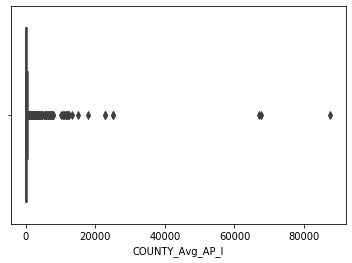

In [73]:
import seaborn as sns
sns.boxplot(x=First_review_data.COUNTY_Avg_AP_I)

In [74]:
targets= First_review_data[['COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I']]

In [75]:
targets.head()

,COUNTY_Avg_AP_I,State_Avg_AP_I,US_Avg_AP_I
0,2191.368421,2318.448133,2686.548069
1,105.100000,119.827692,113.039792
2,361.714286,105.950000,0.000000
3,327.735294,944.749069,497.638833
4,369.666667,2271.111675,1361.540795


In [76]:
numerical.columns

Index(['fipstate', 'COUNTY_fipscty', 'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap',
       'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg',
       'state_emp', 'state_qp1', 'state_ap', 'state_est', 'state_sz_small',
       'state_sz_med', 'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [77]:
standardized_num = preprocessing.scale(numerical)

In [78]:
standardized_num = pd.DataFrame(standardized_num)

In [79]:
standardized_num.columns =['fipstate', 'COUNTY_fipscty', 'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap',
       'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg',
       'state_emp', 'state_qp1', 'state_ap', 'state_est', 'state_sz_small',
       'state_sz_med', 'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg']

In [80]:
CAT_DATA = pd.get_dummies(categorical)

In [81]:
FINAL_Texas_DATA = pd.concat([naics,First_review_data['COUNTY_fipscty'],CAT_DATA,standardized_num,target],axis=1)

In [82]:
FINAL_Texas_DATA.head()

,naics,COUNTY_fipscty,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,...,state_sz_med,state_sz_lrg,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg,COUNTY_Avg_AP_I
0,515,29,0,1,0,0,0,0,0,0,...,-0.062377,-0.104581,-0.028768,0.045123,0.032371,-0.074640,-0.076903,0.019390,-0.014425,2191.368421
1,4532,61,0,0,0,0,0,1,0,0,...,-0.112118,-0.104581,-0.113967,-0.108142,-0.109196,-0.115630,-0.115632,-0.109860,-0.098488,105.100000
2,3169,141,0,0,0,0,0,0,1,0,...,-0.114379,-0.104581,-0.114932,-0.108518,-0.109612,-0.118689,-0.118759,-0.110082,-0.098488,361.714286
3,238,449,0,0,0,0,0,1,0,0,...,0.161459,-0.104581,1.193668,1.118799,1.307398,2.254893,2.286210,0.941462,0.168536,327.735294
4,44511,283,0,1,0,0,0,0,0,0,...,1.461515,-0.104581,0.467703,0.155056,0.155254,0.043465,0.008157,1.491552,-0.093543,369.666667


In [83]:
FINAL_Texas_DATA.naics.dtype

dtype('O')

In [84]:
FINAL_Texas_DATA.naics=pd.to_numeric(FINAL_Texas_DATA.naics)

In [85]:
#FINAL_Texas_DATA.to_csv("Preprocessed_texas_data.csv")

In [86]:
FINAL_Texas_DATA.columns

Index(['naics', 'COUNTY_fipscty', 'state_lfo_-', 'state_lfo_C', 'state_lfo_G',
       'state_lfo_N', 'state_lfo_O', 'state_lfo_P', 'state_lfo_S',
       'state_lfo_Z', 'US_lfo_-', 'US_lfo_C', 'US_lfo_G', 'US_lfo_N',
       'US_lfo_O', 'US_lfo_P', 'US_lfo_S', 'US_lfo_Z', 'fipstate',
       'COUNTY_fipscty', 'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est',
       'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg', 'state_emp',
       'state_qp1', 'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est', 'US_sz_small',
       'US_sz_med', 'US_sz_lrg', 'COUNTY_Avg_AP_I'],
      dtype='object')

In [87]:
FINAL_Texas_DATA['naics'].isnull().sum()

22

In [88]:
FINAL_Texas_DATA=FINAL_Texas_DATA.dropna()

In [89]:
#Strain_Y=First_review_data['fipstate']
#UStrain_Y=First_review_data['US_Avg_AP_I']

In [90]:
FINAL_Texas_DATA.COUNTY_Avg_AP_I.describe()

count     6232.000000
mean       332.173192
std       1949.450656
min          0.000000
25%          0.000000
50%          0.000000
75%        240.823529
max      87570.500000
Name: COUNTY_Avg_AP_I, dtype: float64

In [91]:
T_D = FINAL_Texas_DATA[FINAL_Texas_DATA.COUNTY_Avg_AP_I != 0]

T_D['COUNTY_Avg_AP_I'].describe()



count     2949.000000
mean       701.967899
std       2787.992557
min          4.666667
25%        121.135135
50%        259.633803
75%        556.513514
max      87570.500000
Name: COUNTY_Avg_AP_I, dtype: float64

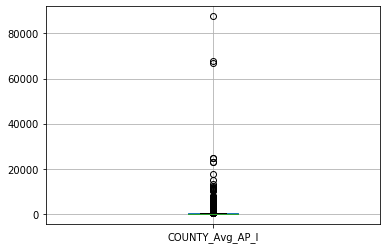

In [92]:
FINAL_Texas_DATA.boxplot(column=['COUNTY_Avg_AP_I'])

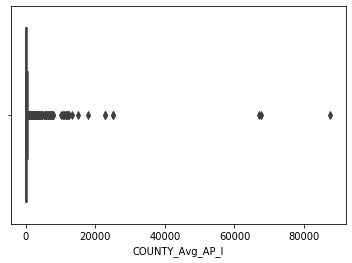

In [93]:
import seaborn as sns
sns.boxplot(x=FINAL_Texas_DATA.COUNTY_Avg_AP_I)

# 'extremely_low' =0-6
# 'low'=6-120
# 'med'=120-551
# 'high'=551-95690


In [94]:
FINAL_Texas_DATA['Countybins'] = pd.cut(x= FINAL_Texas_DATA['COUNTY_Avg_AP_I'], bins=[0,6,120, 551, 95690],labels = ['0','1', '2', '3'],include_lowest=True)


In [95]:
Ctrain_Y=FINAL_Texas_DATA['Countybins']



In [96]:
Ctrain_Y.head()

0    3
1    1
2    2
3    2
4    2
Name: Countybins, dtype: category
Categories (4, object): [0 < 1 < 2 < 3]

In [97]:
FINAL_Texas_DATA = FINAL_Texas_DATA.drop(columns = ["Countybins"])

In [98]:
FINAL_Texas_DATA= FINAL_Texas_DATA.drop(columns=['naics'])

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_Ctrain, X_Cval, y_Ctrain, y_Cval = train_test_split(FINAL_Texas_DATA,Ctrain_Y,test_size = 0.4,random_state = 123)

In [101]:
X_Ctrain.columns

Index(['COUNTY_fipscty', 'state_lfo_-', 'state_lfo_C', 'state_lfo_G',
       'state_lfo_N', 'state_lfo_O', 'state_lfo_P', 'state_lfo_S',
       'state_lfo_Z', 'US_lfo_-', 'US_lfo_C', 'US_lfo_G', 'US_lfo_N',
       'US_lfo_O', 'US_lfo_P', 'US_lfo_S', 'US_lfo_Z', 'fipstate',
       'COUNTY_fipscty', 'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est',
       'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg', 'state_emp',
       'state_qp1', 'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est', 'US_sz_small',
       'US_sz_med', 'US_sz_lrg', 'COUNTY_Avg_AP_I'],
      dtype='object')

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn import datasets
from sklearn.feature_selection import RFE

In [103]:
logreg = LogisticRegression() #

In [104]:
#logreg.fit(X_Ctrain, y_Ctrain) #fitting the model 
X_Ctrain.head()

,COUNTY_fipscty,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,...,state_sz_med,state_sz_lrg,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg,COUNTY_Avg_AP_I
5409,61,0,0,0,0,0,0,0,1,0,...,-0.098552,-0.104581,-0.050501,-0.055959,-0.053262,-0.047405,-0.047565,-0.036129,-0.093543,175.000000
4564,119,0,0,0,1,0,0,0,0,0,...,-0.114379,-0.104581,-0.114841,-0.108467,-0.109561,-0.118546,-0.118613,-0.110082,-0.098488,0.000000
5793,469,1,0,0,0,0,0,0,0,0,...,0.052932,0.005399,-0.114924,-0.108513,-0.109605,-0.118662,-0.118732,-0.110082,-0.098488,0.000000
2746,167,0,0,0,0,0,1,0,0,0,...,-0.091769,-0.104581,-0.114833,-0.108443,-0.109534,-0.118546,-0.118613,-0.110082,-0.098488,115.235294
4135,149,0,0,0,0,0,0,1,0,1,...,-0.100813,-0.049591,0.975672,2.576815,2.225590,0.174880,0.147722,1.184195,2.220668,460.333333


In [105]:
#y_pred_County = linreg.predict(X_Cval)
#print(metrics.mean_squared_error(y_Cval, y_pred_County))
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_Ctrain, y_Ctrain) # performing RFE for variable ranks
print(rfe.support_)
print(rfe.ranking_)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

[False False False  True False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True False  True  True  True  True False  True False  True
  True  True  True False False]
[23  2  5  1  7  8  3  6  4  9 11 18 12 13 15 14 10 24 22  1  1  1  1  1
  1  1  1 17  1  1  1  1 21  1 20  1  1  1  1 19 16]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [106]:
feature_names = list(X_Ctrain.columns.values)

In [107]:
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), feature_names)))

[(1, 'COUNTY_ap'), (1, 'COUNTY_emp'), (1, 'COUNTY_est'), (1, 'COUNTY_qp1'), (1, 'COUNTY_sz_lrg'), (1, 'COUNTY_sz_med'), (1, 'COUNTY_sz_small'), (1, 'US_ap'), (1, 'US_emp'), (1, 'US_est'), (1, 'US_sz_med'), (1, 'US_sz_small'), (1, 'state_ap'), (1, 'state_emp'), (1, 'state_est'), (1, 'state_lfo_G'), (1, 'state_sz_med'), (1, 'state_sz_small'), (2, 'state_lfo_-'), (3, 'state_lfo_P'), (4, 'state_lfo_Z'), (5, 'state_lfo_C'), (6, 'state_lfo_S'), (7, 'state_lfo_N'), (8, 'state_lfo_O'), (9, 'US_lfo_-'), (10, 'US_lfo_Z'), (11, 'US_lfo_C'), (12, 'US_lfo_N'), (13, 'US_lfo_O'), (14, 'US_lfo_S'), (15, 'US_lfo_P'), (16, 'COUNTY_Avg_AP_I'), (17, 'state_qp1'), (18, 'US_lfo_G'), (19, 'US_sz_lrg'), (20, 'US_qp1'), (21, 'state_sz_lrg'), (22, 'COUNTY_fipscty'), (23, 'COUNTY_fipscty'), (24, 'fipstate')]


## Should drop couple of columns based on the rankings

In [108]:
#FINAL_Texas_DATA= FINAL_Texas_DATA.dropdrop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I'])

In [109]:
logreg = LogisticRegression()
logreg.fit(X_Ctrain, y_Ctrain) #fitting the model 

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
y_pred_val = logreg.predict(X_Cval)

In [111]:
y_Cval

3480    0
4004    0
657     0
3786    0
1997    1
       ..
4754    0
3929    0
3782    3
2722    0
1200    0
Name: Countybins, Length: 2493, dtype: category
Categories (4, object): [0 < 1 < 2 < 3]

In [112]:
y_pred_val = pd.DataFrame(y_pred_val)

In [113]:
y_pred_val

,0
0,0
1,0
2,0
3,0
4,2
...,...
2488,0
2489,0
2490,3
2491,0


In [114]:
print(metrics.classification_report(y_Cval,y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       0.79      0.04      0.07       293
           2       0.67      0.97      0.79       593
           3       0.94      0.99      0.97       284

    accuracy                           0.88      2493
   macro avg       0.85      0.75      0.71      2493
weighted avg       0.89      0.88      0.84      2493



In [115]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
clf_glm = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0) #fitting the Gridsearch model
best_model = clf_glm.fit(X_Ctrain, y_Ctrain)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify

In [118]:
# View best hyperparameters 
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [121]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
    #randomForestClassifier
rfc = RandomForestClassifier( oob_score=True, random_state=123456, class_weight= 'balanced')
rfc.fit(X_Ctrain, y_Ctrain)



//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=True,
                       random_state=123456, verbose=0, warm_start=False)

In [122]:
#Accuracy score
predicted = rfc.predict(X_Ctrain) #predicting
pred_RFC= pd.DataFrame(predicted) #prediction dataframe
print(metrics.classification_report(y_Ctrain, predicted)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1961
           1       1.00      1.00      1.00       429
           2       1.00      1.00      1.00       886
           3       1.00      1.00      1.00       463

    accuracy                           1.00      3739
   macro avg       1.00      1.00      1.00      3739
weighted avg       1.00      1.00      1.00      3739



In [123]:
#Accuracy score
predicted = rfc.predict(X_Cval) #predicting
pred_RFC= pd.DataFrame(predicted) #prediction dataframe
print(metrics.classification_report(y_Cval, predicted)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       1.00      0.99      0.99       293
           2       0.99      1.00      1.00       593
           3       1.00      0.99      1.00       284

    accuracy                           1.00      2493
   macro avg       1.00      1.00      1.00      2493
weighted avg       1.00      1.00      1.00      2493



In [124]:
scores = cross_val_score(rfc,X_Ctrain, y_Ctrain,cv=10)  #cross validation
np.array(scores).mean() 

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(

0.9941190195590701

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_Ctrain, y_Ctrain) #fitting the model on data and target

In [126]:
# performing Gridsearch on Decisiontree classifier
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'min_samples_split': [2,5,10,15,20,25,30,35,40,50,60],'min_samples_leaf': [1, 5, 10, 15, 20],
              'max_leaf_nodes': [None, 5, 10, 20]}
GridDt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

In [127]:
GridDt.fit(X_Ctrain, y_Ctrain) #fitting Grid model on data and target

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

In [128]:
print(GridDt.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [129]:
clf_giniFI = DecisionTreeClassifier(criterion = "gini",max_depth=3,min_samples_leaf = 1,min_samples_split = 2)

In [130]:
clf_g= clf_giniFI.fit(X_Ctrain, y_Ctrain)

In [131]:
y_pred_val_giniFI = clf_g.predict(X_Cval)
print(metrics.classification_report(y_Cval, y_pred_val_giniFI))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       1.00      1.00      1.00       293
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00       284

    accuracy                           1.00      2493
   macro avg       1.00      1.00      1.00      2493
weighted avg       1.00      1.00      1.00      2493



In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf  

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=41, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_Ctrain, y_Ctrain, epochs=50, batch_size=64)
# evaluate the keras model
_, accuracy = model.evaluate(X_Ctrain, y_Ctrain)
print('Accuracy: %.2f' % (accuracy*100))

In [119]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier

Using TensorFlow backend.
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Future

In [120]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
    model = Sequential()
    model.add(Dense(20, input_dim=41, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# performing Gridsearch on Decisiontree classifier
from sklearn.model_selection import GridSearchCV
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(optimizer=optimizer)
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
param_grid = dict(init_mode=init_mode)
param_grid = dict(activation=activation)
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
param_grid = dict(neurons=neurons)

param_grid = dict(batch_size=batch_size, epochs=epochs)
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_Ctrain, y_Ctrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Best: 0.703664 using {'epochs': 10}
0.703664 (0.121878) with: {'epochs': 10}
0.560310 (0.044124) with: {'epochs': 20}
0.636266 (0.083091) with: {'epochs': 30}
